# Augmented Dickey-Fuller Test in Python

* Ref: https://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/
* Data: 用 random 產生

## Stationary vs. Non-Stationary
* Stationary: mean and variance are constant over time
* Non-stationary: dependent on time

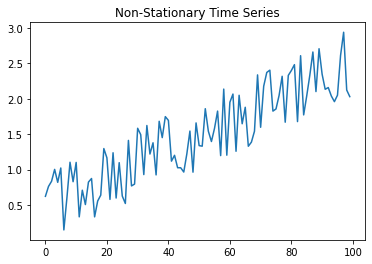

In [1]:
# Non-stationary
import matplotlib.pyplot as plt
import random

random.seed(5)

non_stationary_series = []
for i in range(0,100):
    non_stationary_series.append(random.random() + (i * .02))
    
plt.plot(non_stationary_series)
plt.title('Non-Stationary Time Series')
plt.show()

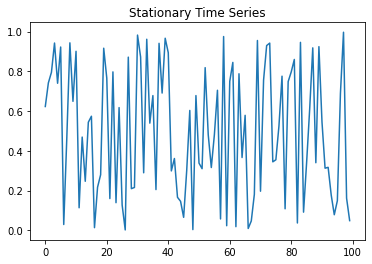

In [2]:
# Stationary
import matplotlib.pyplot as plt
import random

random.seed(5)

stationary_series = []
for i in range(0,100):
    stationary_series.append(random.random())
    
plt.plot(stationary_series)
plt.title('Stationary Time Series')
plt.show()

## Augmented Dickey-Fuller Test (ADF) Statistical Test
* ADF 用來判斷一個 time series 是不是 stationary
* ADF is a type of **unit root** test
  * Unit roots 會造成 non-stationarity
  * ADF test 用來測試 unit root 是否存在.
* Null Hypothesis: unit root 存在 
  * time series 是 non-stationary
* Alternate Hypothesis: unit root 不存在
  * time series 是 stationary
* 用 `adfuller()`
  * 輸入是 1d array
  * Akaike Information Criterion (AIC) 用來決定 lags
  * 輸出是
    * Test Statistic
    * $p$-Value
    * Number of Lags Used
    * Number of Observations used for the ADF regression
    * Critical Values.
  * $p$-value < 0.05
    * reject null hypothesis
    * time series is stationary
  * 如果 $p$-value 和 0.05 非常接近時，比較 test statistic 和 critical values
    * test statistic < critical values 時 reject null hypothesis

In [3]:
import pandas as pd
# import statsmodels
from statsmodels.tsa.stattools import adfuller

class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None

    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 用 non-stationary 來測試
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(non_stationary_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -0.752446
P-Value                  0.832693
# Lags Used              7.000000
# Observations Used     92.000000
Critical Value (1%)     -3.503515
Critical Value (5%)     -2.893508
Critical Value (10%)    -2.583824
dtype: float64
Is the time series stationary? False


* 結果是 $p$-value > 0.05 所以 ADF 判斷是 non-stationary
* test statistic 也比 critical values 大

In [5]:
# 用 stationary 來測試
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(stationary_series, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -1.045848e+01
P-Value                 1.378722e-18
# Lags Used             0.000000e+00
# Observations Used     9.900000e+01
Critical Value (1%)    -3.498198e+00
Critical Value (5%)    -2.891208e+00
Critical Value (10%)   -2.582596e+00
dtype: float64
Is the time series stationary? True


* 結果是 $p$-value < 0.05 所以 ADF 判斷是 stationary
* test statistic 也比 critical values 小